# 1. Backpropagation
## a. the dimensions:
Steps: 
1. The hidden layer $h=\sigma(z_1)$ is a d-dimensional vector (d\*1), as $h \in \mathbb{R}^d$. Additionally, $\sigma$ is a activation function, so $z_1$ is also a d-dimensional vector (d\*1). 
2. $z_1 = W^{(1)}x$, and x is a d-dimensional vector. To get $z_1$ (d\*1), $W^{(1)}$ needs to be (d\*d).
3. $z_2 = h + x$. Both $h$ and $x$ are (d\*1) vectors, so $z_2$ is also (d\*1).
4. $y = W^{(2)}z_2$ and $y$ is a single value (1\*1). $z_2$ is (d\*1). So $W^{(2)}$ needs to be (1\*d).
Therefore,
- $W^{(1)}$: (d\*d)
- $W^{(2)}$: (1\*d)
- $z_1$: (d\*1)
- $z_2$: (d\*1)
.

## b. number of parameters
Parameters lie in the weight matrices. 
- $W^{(1)}$: (d\*d) matrix, so d\*d elements.
- $W^{(2)}$: (1\*d) matrix, so d elements.  
  
Therefore, the number of parameters in this network is $d^2+d$.

## c. gradient of loss  
- for 1., we simply derive the loss function with respect to y.
- for 2.-7., we need to apply the chain rule.
1. $$\bar{y}=\frac{\partial\mathcal{L}}{\partial y}$$
$$=\frac{\partial}{\partial y}(\frac{1}{2}(y-t)^2)$$
$$=y-t$$
.  
2. $$\bar{W}^{(2)}=\frac{\partial\mathcal{L}}{\partial W^{(2)}}$$
$$=\frac{\partial \mathcal{L}}{\partial y}\frac{\partial y}{\partial W^{(2)}}$$
$$=(y-t)\frac{\partial}{\partial  W^{(2)}}(W^{(2)}z_2)$$
$$=(y-t)z_2^T$$
.  
3. $$\bar{z}_2=\frac{\partial\mathcal{L}}{\partial z_2}$$
$$=\frac{\partial \mathcal{L}}{\partial y}\frac{\partial y}{\partial z_2}$$
$$=(y-t)\frac{\partial}{\partial  z_2}(W^{(2)}z_2)$$
$$=(y-t)W^{(2)T}$$
.  
4. $$\bar{h}=\frac{\partial\mathcal{L}}{\partial h}$$
$$=\frac{\partial \mathcal{L}}{\partial z_2}\frac{\partial z_2}{\partial h}$$
$$=(y-t)W^{(2)T}\frac{\partial}{\partial h}(h+x)$$
$$=(y-t)W^{(2)T}I_d$$
$$=(y-t)W^{(2)T}$$
.  
5. $$\bar{z}_1=\frac{\partial\mathcal{L}}{\partial z_1}$$
$$=\frac{\partial \mathcal{L}}{\partial h}\frac{\partial h}{\partial z_1}$$
$$=(y-t)W^{(2)T}\frac{\partial}{\partial z_1}(\sigma(z_1))$$
$$=(y-t)W^{(2)T}\sigma'(z_1)$$
.  
6. $$\bar{W}^{(1)}=\frac{\partial\mathcal{L}}{\partial W^{(1)}}$$
$$=\frac{\partial \mathcal{L}}{\partial z_1}\frac{\partial z_1}{\partial W^{(1)}}$$
$$=(y-t)W^{(2)T}\frac{\partial }{\partial W^{(1)}}(W^{(1)}x)$$
$$=(y-t)W^{(2)T}\sigma'(z_1)x^T$$
.  
7. $$\bar{x}=\frac{\partial\mathcal{L}}{\partial x}$$
$$=\frac{\partial \mathcal{L}}{\partial z_1}\frac{\partial z_1}{\partial x}$$
$$=(y-t)W^{(2)T}\frac{\partial }{\partial x}(W^{(1)}x)$$
$$=(y-t)W^{(2)T}\sigma'(z_1)W^{(1)T}$$
.  






---
# 2. TBD

---
# 3. Class-Conditional Gaussians
## 3.1 Bayes Rule
$$p(y=k|x,\mu,\sigma)=\frac{p(y=k)p(x|y=k,\mu,\sigma)}{p(x)}$$
$$=\frac{\alpha_k \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})}{p(x)}$$
- For p(x), we apply the law of total probability:
$$p(x) = \sum_k p(x|y_k)p(y_k)$$
$$=\sum_k \alpha_k \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})$$
- Therefore, 
$$p(y=k|x,\mu,\sigma) = \frac{\alpha_k \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})}{\sum_k \alpha_k \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})}$$
.


## 3.2 Negative Log Likelihood Function
- Since we assume i.i.d., the likelihood function can be written as the joint probability:
$$p(y^{(1)},x^{(1)},...,y^{(N)},x^{(N)}|\theta)$$
$$=\Pi^N_{n=1}p(y^{(n)},x^{(n)})|\theta)$$
- each probability term can be further written as:
$$p(y^{(n)},x^{(n)})|\theta) = p(y^{(n)}|\theta)\cdot p(x^{(n)}|y^{(n)},\theta)$$
$$=\texttt{prior}\cdot \texttt{likelihood}$$
- in other words, it is the posterior without normalization. The joint probability is thus written as:
$$\Pi^N_{n=1} [\alpha_n \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})]$$
- Therefore, the negative log likelihood is
$$\ell (\theta;D) = -\log p(y^{(1)},x^{(1)},...,y^{(N)},x^{(N)}|\theta)$$
$$=-\log [\Pi^N_{n=1} [\alpha_n \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})]]$$
$$=-[\sum^N_{n=1} [\log [\alpha_n \cdot (\Pi^D_{i=1} 2\pi \sigma_i^2)^{-\frac{1}{2}}\cdot \exp({-\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}})]]]$$
$$=-[\sum^N_{n=1} [\log \alpha_n -\frac{1}{2} \log (\Pi^D_{i=1} 2\pi \sigma_i^2) -\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}]]$$
$$=-[\sum^N_{n=1} [\log \alpha_n -\frac{1}{2} \sum^D_{i=1}\log (2\pi \sigma_i^2) -\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}]]$$
$$=-\sum^N_{n=1} \log \alpha_n + \frac{1}{2}\sum^N_{n=1} \sum^D_{i=1}\log (2\pi \sigma_i^2) +\sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}$$
.


## 3.3 partial derivatives
$$\ell (\theta;D) = -\sum^N_{n=1} \log \alpha_n + \frac{1}{2}\sum^N_{n=1} \sum^D_{i=1}\log (2\pi \sigma_i^2) +\sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}$$

### 3.3.1 partial derivative of NLL w.r.t mean (mu_ki)
$$\frac{\partial \ell (\theta;D)}{\partial \mu_{ki}}$$
$$=\frac{\partial}{\partial \mu_{ki}}(0+0+\sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2})$$
- first, we try to calculate the simplified form:   
$ \frac{\partial}{\partial \mu}\frac{(x-\mu)^2}{2\sigma^2}$   
$=\frac{1}{2\sigma^2}\cdot 2(x-\mu)\cdot (-1)$  
$= -\frac{x-\mu}{\sigma^2}$  
.   

So, 
$$\frac{\partial}{\partial \mu_{ki}}(\sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2})$$
$$=-\frac{x_i-\mu_{ki}}{\sigma^2_i}$$
.
  




### 3.3.2 partial derivative of NLL w.r.t shared variance (sigma_i square)
$$\frac{\partial \ell (\theta;D)}{\partial \sigma_i^2}$$
$$=\frac{\partial}{\partial \sigma_i^2}(0+\frac{1}{2}\sum^N_{n=1} \sum^D_{i=1}\log (2\pi \sigma_i^2)+\sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2})$$
$$=\frac{\partial}{\partial \sigma_i^2}(\frac{1}{2}\sum^N_{n=1} \sum^D_{i=1}\log (2\pi \sigma_i^2)  +  \sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2})$$
- for the first term $\frac{1}{2}\sum^N_{n=1}\sum^D_{i=1} \log (2\pi\sigma_i^2)$:  
$\frac{\partial}{\partial \sigma_i^2} \frac{1}{2}\sum^N_{n=1}\sum^D_{i=1} \log (2\pi\sigma_i^2)$   
$=\frac{1}{2}\sum^N_{n=1} \frac{2\pi}{2\pi\sigma_i^2}$  
$=\frac{N}{2\sigma_i^2}$  
- for the second term: $\sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2})$:  
$\frac{\partial}{\partial \sigma_i^2} \sum^N_{n=1}\sum^D_{i=1}\frac{(x_i-\mu_{ki})^2}{2\sigma_i^2}$    
$=\sum^N_{n=1} (-\frac{(x_i-\mu_{ki})^2}{2}\cdot \frac{1}{(\sigma_i^2)^2})$  
$=-\frac{1}{2(\sigma_i^2)^2} \sum^N_{n=1}(x_i-\mu_{ki})^2$  
  
Therefore, 
$$\frac{\partial \ell (\theta;D)}{\partial \sigma_i^2}$$
$$=\frac{N}{2\sigma_i^2} - \frac{1}{2(\sigma_i^2)^2} \sum^N_{n=1}(x_i-\mu_{ki})^2$$
.



## 3.4.MLE 
### 3.4.1 MLE of mu
$$-\frac{x_i-\mu_{ki}}{\sigma^2_i} = 0$$
$$\mu_{ki} = x_i$$
This means the MLE of $\mu$ is equal to the average of $x_i$ for y == class k.

### 3.4.2 MLE of sigma
$$\frac{N}{2\sigma_i^2} - \frac{1}{2(\sigma_i^2)^2} \sum^N_{n=1}(x_i-\mu_{ki})^2 = 0$$
$$\frac{N}{2\sigma_i^2} = \frac{1}{2(\sigma_i^2)^2} \sum^N_{n=1}(x_i-\mu_{ki})^2$$
$$N\sigma_i^2 = \sum^N_{n=1}(x_i-\mu_{ki})^2$$
$$\sigma_i = \sqrt{\frac{1}{N} \sum^N_{n=1}(x_i-\mu_{ki})^2}$$
This indicates that the MLE of $\sigma_i$ is the standard deviation of feature $i$ across all samples.




---
# 4. Handwritten digit classification 


In [30]:
from hw3_startercode import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


## 4.1 multi-layer perceptron classifier


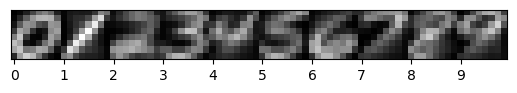

In [46]:
# a. load the data & plot the means
train_data, train_labels, test_data, test_labels = data.load_all_data_from_zip('hw3_startercode/a3digits.zip','hw3_startercode/loaded_data/')
# for i in [train_data, train_labels, test_data, test_labels]:
#     print(i.shape)

def plot_means(train_data, train_labels):
    means = []
    for i in range(0, 10):
        i_digits = data.get_digits_by_label(train_data, train_labels, i)
        # Compute mean of class i
        means.append(np.mean(i_digits, axis=0).reshape(8,8))

    # Plot all means on same axis
    all_concat = np.concatenate(means, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.yticks([])
    plt.xticks(ticks=np.arange(0,73,8),labels=range(10))
    plt.show()

plot_means(train_data, train_labels)

In [38]:
# b. multi layer perceptron neural network

train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_data_tensor = torch.tensor(test_data, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def build_mlp(input_size, hidden_layers, output_size):
    layers = []
    in_features = input_size
    for hidden_size in hidden_layers:
        layers.append(nn.Linear(in_features, hidden_size))
        layers.append(nn.ReLU())
        in_features = hidden_size
    layers.append(nn.Linear(in_features, output_size))
    return nn.Sequential(*layers)

def evaluate_accuracy(model, loader, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

def train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    for epoch in range(epochs):
        model.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    train_accuracy = evaluate_accuracy(model, train_loader, device)
    test_accuracy = evaluate_accuracy(model, test_loader, device)
    return train_accuracy, test_accuracy

# Experiment i: Varying the depth of the network with Kw = 64
input_size = 64
output_size = 10
width = 64  # Kw
criterion = nn.CrossEntropyLoss()

print("i: Varying Depth")
for depth in range(0, 11):
    hidden_layers = [width] * depth
    model = build_mlp(input_size, hidden_layers, output_size)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_acc, test_acc = train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer)
    print(f"Depth: {depth}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Experiment ii: Varying the width of the network with Kd = 3
depth = 3  # Kd
criterion = nn.CrossEntropyLoss()

print("\nii: Varying Width")
for width in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    hidden_layers = [width] * depth
    model = build_mlp(input_size, hidden_layers, output_size)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_acc, test_acc = train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer)
    print(f"Width: {width}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


/var/folders/4f/yqk707nn61d0n9l9qmlg7f4w0000gn/T/ipykernel_38455/3321900236.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data, dtype=torch.float32)
/var/folders/4f/yqk707nn61d0n9l9qmlg7f4w0000gn/T/ipykernel_38455/3321900236.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.long)
/var/folders/4f/yqk707nn61d0n9l9qmlg7f4w0000gn/T/ipykernel_38455/3321900236.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = torch.tensor(test_data, dtype

i: Varying Depth
Depth: 0, Train Accuracy: 0.9103, Test Accuracy: 0.9040
Depth: 1, Train Accuracy: 0.9536, Test Accuracy: 0.9475
Depth: 2, Train Accuracy: 0.9549, Test Accuracy: 0.9425
Depth: 3, Train Accuracy: 0.9669, Test Accuracy: 0.9553
Depth: 4, Train Accuracy: 0.9746, Test Accuracy: 0.9535
Depth: 5, Train Accuracy: 0.9684, Test Accuracy: 0.9485
Depth: 6, Train Accuracy: 0.9687, Test Accuracy: 0.9467
Depth: 7, Train Accuracy: 0.9624, Test Accuracy: 0.9395
Depth: 8, Train Accuracy: 0.9563, Test Accuracy: 0.9310
Depth: 9, Train Accuracy: 0.9430, Test Accuracy: 0.9167
Depth: 10, Train Accuracy: 0.9374, Test Accuracy: 0.9127

ii: Varying Width
Width: 2, Train Accuracy: 0.3613, Test Accuracy: 0.3600
Width: 4, Train Accuracy: 0.6791, Test Accuracy: 0.6753
Width: 8, Train Accuracy: 0.8559, Test Accuracy: 0.8480
Width: 16, Train Accuracy: 0.9277, Test Accuracy: 0.9220
Width: 32, Train Accuracy: 0.9519, Test Accuracy: 0.9413
Width: 64, Train Accuracy: 0.9603, Test Accuracy: 0.9500
Width: 1

# <span style="color: red; font-weight: bold;">4.1 NOT DONE</span>


## 4.2 Conditional Gaussian Classifier Training

In [58]:
# starter code & functions 

def make_train_df(train_data, train_labels):
    data_df = pd.DataFrame(train_data)
    labels_df = pd.DataFrame(train_labels, columns=['label'])
    train_df = pd.concat([data_df, labels_df], axis=1)
    return train_df

def compute_mean_mles(train_data, train_labels):
    '''
    make sure the inputs are both np.arrays instead of tensors
    Compute the mean estimate for each digit class

    Should return a numpy array of size (10,64)
    The ith row will correspond to the mean estimate for digit class i
    '''
    means = np.zeros((10, 64))
    # Compute means
    train_df = make_train_df(train_data,train_labels)
    means = train_df.groupby('label').mean().sort_index().to_numpy()
    return means # shape: (10,64); row 1 being 0 all the way to row 10 being 9

def compute_sigma_mles(train_data, train_labels):
    '''
    Compute the covariance estimate for each digit class

    Should return a three dimensional numpy array of shape (10, 64, 64)
    consisting of a covariance matrix for each digit class 
    '''
    covariances = np.zeros((10, 64, 64))
    # Compute covariances
    train_df = make_train_df(train_data,train_labels)
    means = compute_mean_mles(train_data,train_labels) #(10,64)
    for idx, (label, group) in enumerate(train_df.sort_values(by='label').reset_index(drop=True).groupby('label')):
        # labels are sorted so groups are in ascending order
        X = group.drop(columns='label') # (700*16)
        N = X.shape[0] # 700 cases for every digit
        cov = ((X-means[idx]).T @ (X-means[idx])) / (N) + 0.01*np.eye(64) # (64,64)
        covariances[idx] = cov 
    return covariances

def plot_cov_diagonal(covariances):
    # Plot the log-diagonal of each covariance matrix side by side
    fix,ax = plt.subplots(1,10,figsize=(15,1.5))
    for i in range(10):
        cov_diag = np.diag(covariances[i])
        log_cov_diag = np.log(cov_diag)
        ax[i].plot(log_cov_diag)
        ax[i].set_title(f'{i}')
    plt.tight_layout()
    plt.show()

def generative_likelihood(digits, means, covariances):
    '''
    digits: basically the training data (7000*64)
    means: the means of the 64 features of 10 digits, fro 0 to 9 (10*64)
    covariancs: the cov matrices of the 10 digits, from 0 to 9 (10*64*64)

    Compute the generative log-likelihood:
        log p(x|y,mu,Sigma)

    Should return an n x 10 numpy array (n=7000)
    '''
    n,d = digits.shape # (7000,64)
    log_likelihoods = np.zeros((n,10))

    for i in range(10):
        mu = means[i] # (64,)
        cov = covariances[i] # (64,64)
        diff = digits - mu # (7000,64)
        
        # take the log on the gaussian pdf 
        # for the exponential term (-1/2 (x-mu)T cov-1 (x-mu)), rewrite it to the sum of (x-mu) @ cov-1 * (x-mu)
        log_pdf = -d*np.log(2*np.pi)/2 - np.log(np.linalg.det(cov))/2 - np.sum(diff @ np.linalg.inv(cov) * diff, axis=1)/2 # (7000,)
        log_likelihoods[:,i] = log_pdf

    return log_likelihoods # (7000,10)

def conditional_likelihood(digits, means, covariances):
    '''
    Compute the conditional likelihood:

        log p(y|x, mu, Sigma)

    This should be a numpy array of shape (n, 10); for training set, n = 7000; it should also be generalized to/usable for any test point
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''

    # log posterior = log prior + log likelihood - log marginal likelihood 
    log_likelihoods = generative_likelihood(digits,means,covariances) #(7000*10) for training set
    log_prior = np.log(1/10) #scalar

    # marginal likelihood = sum of prior*likelihood = sum of (exp(log prior + log likelihood))
    # remember to put the log back for consistency (we're doing log for all {prior,likelihood,posterior} here)
    log_marg = np.log(np.sum(np.exp(log_prior+log_likelihoods),axis=1)) #(7000,) for training

    # use [:, np.newaxis] to broadcast the n values onto every column (each col has n rows)
    log_post = log_prior + log_likelihoods - log_marg[:, np.newaxis]

    return log_post #(n*10); in Bayesian sense it is the posterior, but we'll just call it log likelihood in general

def avg_conditional_likelihood(digits, labels, means, covariances):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, mu, Sigma) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    cond_likelihood = conditional_likelihood(digits, means, covariances)
    df = pd.DataFrame(cond_likelihood)
    df['label'] = labels 

    for idx, row in df.iterrows():
        label = row['label']
        row[:10] = np.where(row.index[:10] == label, row[:10], np.nan)
    
    df.drop(columns = 'label', inplace=True)
    avg_log_likelihood= df.mean(skipna=True).to_numpy() #(10,) which is the avg of each digit

    return avg_log_likelihood

def classify_data(digits, means, covariances):
    '''
    Classify new points by taking the most likely posterior class

    digits here can be a test set with arbitrary test points (n)
    '''
    cond_likelihood = conditional_likelihood(digits, means, covariances)
    # Compute and return the most likely class
    preds = np.argmax(cond_likelihood, axis=1) #(n,)
    return preds 

def eval(train_data, train_labels, test_data, test_labels):
    # Fit the model
    means = compute_mean_mles(train_data, train_labels)
    covariances = compute_sigma_mles(train_data, train_labels)

    # evaluations 
    train_avg_log_likelihood = avg_conditional_likelihood(train_data,train_labels,means,covariances)
    test_avg_log_likelihood = avg_conditional_likelihood(test_data,test_labels,means,covariances)

    return train_avg_log_likelihood,test_avg_log_likelihood

In [59]:
eval(train_data, train_labels, test_data, test_labels)

(array([-68.44287442, -70.13945305, -41.62222054, -50.82867237,
        -69.97228534, -54.30875425, -72.06776304, -94.20807654,
        -41.30376327, -75.36902074]),
 array([-67.03794923, -68.69549892, -40.30804267, -49.77817925,
        -68.32725777, -53.14823765, -70.3088478 , -92.55286247,
        -40.18664621, -73.97151365]))

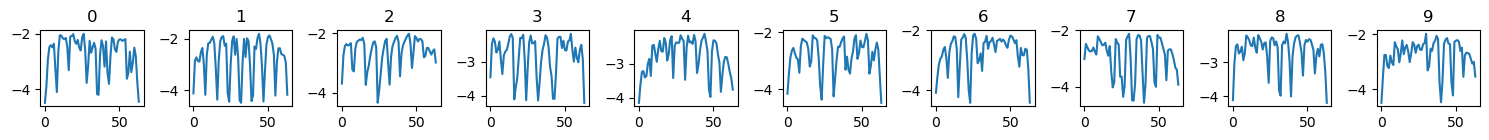

In [49]:
covariances = compute_sigma_mles(train_data,train_labels)
plot_cov_diagonal(covariances)

In [ ]:
# 4.1.a

prior = 1/10

def get_cov(X):
    '''
    X is a training-set-like matrix where each col is a feature, and each row is an observation
    Cov(X) = 1/(N-1) (X-Xbar)T (X-Xbar)
    '''
    N = X.shape[0]
    X_bar = np.mean(X,axis=0) 
    return ((X-X_bar).T @ (X-X_bar)) / (N-1) + 0.01*np.eye(64)

def mv_gaussian_pdf(x, mu, sigma):
    d = x.shape[0]
    return (2*np.pi)**(-d/2) * np.linalg.det(sigma)**(-1/2) * np.exp((-1/2)*(x-mu).T @ np.linalg.inv(sigma) @ (x-mu))


In [56]:
arr = np.zeros((5,3))

arr
dfdf = pd.DataFrame(arr)
shibal = np.array(['a','d','f','g','h'])
dfdf['shi'] = shibal
dfdf
dfdf.at[2,'shi']
dfdf

,0,1,2,shi
0,0.0,0.0,0.0,a
1,0.0,0.0,0.0,d
2,0.0,0.0,0.0,f
3,0.0,0.0,0.0,g
4,0.0,0.0,0.0,h
